In [1]:
from utils import *

In [2]:
read_latency = get_latency_data("READ")
print("client-0", read_latency[0][0:10])
print("client-1", read_latency[1][0:10])
print("client-2", read_latency[2][0:10])

client-0 [[0.195092726, 1.200556346], [0.202645305, 0.208657763], [0.208687921, 0.211829931], [0.211860173, 0.213075708], [0.213109731, 0.216185357], [0.216213435, 0.217632891], [0.217660236, 0.221058826], [0.221084818, 0.22351656], [0.223543261, 0.226581275], [0.226609211, 0.232711889]]
client-1 [[1.215473398, 1.222959061], [1.222978852, 1.225962012], [1.225968729, 1.230031203], [1.230038488, 1.232615051], [1.232621916, 1.234564741], [1.234570874, 1.238139038], [1.238145907, 1.245709525], [1.245716528, 1.248447737], [1.248454563, 1.250655904], [1.250662944, 1.254433537]]
client-2 [[0.1891382, 0.208662651], [0.208687848, 0.213098264], [0.213114631, 0.215621925], [0.215665439, 0.217838316], [0.217863136, 0.220384928], [0.22041104, 0.22245383], [0.222482231, 0.225560535], [0.2255868, 0.227906066], [0.227931621, 0.23118303], [0.231208389, 0.233419617]]


In [3]:
read_latency_avg_per_client = avg_latency_per_client(read_latency, filter=True)
print(read_latency_avg_per_client)
# No Filtering {0: 0.0015988736717557233, 1: 0.0007757902972128163, 2: 0.0012394181232306424}
# With Filtering {0: 0.001195391056672024, 1: 0.0006652733874137021, 2: 0.0011098837808510653}

{0: 0.001195391056672024, 1: 0.0006652733874137021, 2: 0.0011098837808510653}


In [4]:
read_latency_avg = avg_latency(read_latency_avg_per_client)
print("Read Latency in Second:", read_latency_avg)

Read Latency in Second: 0.0009901827416455972


In [5]:
read_rate = get_rate_data("READ")
print(read_rate[0:10])

[(0.311634526, 311.2620454641152), (0.511829946, 1078.945762095856), (0.711956007, 1534.0330912724055), (0.915334194, 1470.1674963795406), (1.111464152, 1702.9524882680087), (1.311584546, 1649.0073470472978), (1.511831018, 1613.012188299627), (1.711946443, 1998.846415762303), (1.912071925, 2268.576672310026), (2.112219942, 2203.369319417239)]


In [6]:
read_rate_avg = avg_rate(read_rate, filter=10)
print("Read Operations Per Second:", read_rate_avg)

(10, 2) 2.112219942
0.19913245499999999 440.99999999999994
0.39927373200000016 989.0000000000005
0.599400427 1496.0
0.799532782 2056.0
0.999686257 2649.0
1.1998063070000002 3125.0000000000005
1.399925288 3611.9999999999995
1.599037677 4149.0
1.7991992970000004 4708.000000000001
1.9993346019999998 5240.999999999999
Read Operations Per Second: 2621.372127885575


In [7]:
config = get_config()

['totalTime', '3000']
['interval', '200']
['totalOperations', '20000']
['lowerbound', '8000']
['sync', 'true']
['server.1', '127.0.0.1:2181']
['server.2', '127.0.0.1:2182']
['server.3', '127.0.0.1:2183']


In [2]:
from utils import *

In [3]:
data = get_mixrw_rate(prefix='results', step=10)

files:
results/MIXREADWRITE-0.0.dat
results/MIXREADWRITE-0.1.dat
results/MIXREADWRITE-0.2.dat
results/MIXREADWRITE-0.3.dat
results/MIXREADWRITE-0.4.dat
results/MIXREADWRITE-0.5.dat
results/MIXREADWRITE-0.6.dat
results/MIXREADWRITE-0.7.dat
results/MIXREADWRITE-0.8.dat
results/MIXREADWRITE-0.9.dat
results/MIXREADWRITE-1.0.dat


In [4]:
avg = {}
for i, d in data.items():
    avg[i] = avg_rate(d, filter=3)
print(avg)

(16, 2) 0.81916292
(14, 2) 5.211963532
(16, 2) 7.414968631
(17, 2) 6.212569444
(16, 2) 5.609238605
(18, 2) 4.615647285
(18, 2) 3.813895318
(18, 2) 3.417988228
(17, 2) 3.823485701
(16, 2) 3.414036851
(21, 2) 3.032890259
{0.0: 3055.884041560421, 0.1: 4360.530955379785, 0.2: 4606.41978687532, 0.3: 4750.45802104818, 0.4: 5453.306363319385, 0.5: 5490.386634551914, 0.6: 6285.949916560855, 0.7: 7596.542528954669, 0.8: 10186.911554054945, 0.9: 16047.144675364625, 1.0: 16167.272145044948}


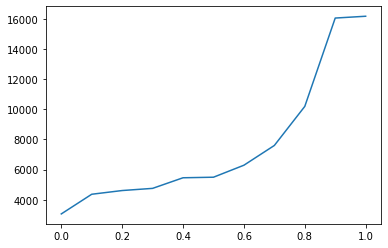

In [6]:
x = []
y = []
for i, v in avg.items():
    x.append(i)
    y.append(v)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(x, y)
plt.show()